# Spam Classification
## Danny Chang, Joey Hernandez

In an era of constant digital communication, the relentless influx of messages and emails can be overwhelming. Among these, a significant portion comprises unwanted and potentially harmful spam messages, which can disrupt productivity and pose security risks. To combat this issue, we embark on a Data Science project aimed at developing a robust spam classification system.

Our goal is to create an intelligent algorithm that can automatically differentiate between legitimate messages and spam, providing users with a clutter-free and secure communication experience. By leveraging the power of machine learning and data analysis, we intend to build a predictive model capable of classifying messages and emails as either "Spam" or "Not Spam" with a high degree of accuracy.

This project will entail various stages, including data collection, preprocessing, feature engineering, model selection, and evaluation. We will draw upon a diverse dataset of messages and emails, encompassing a wide range of characteristics, to train and fine-tune our classification model. Throughout the process, we will explore advanced techniques in natural language processing (NLP) and machine learning to enhance our model's performance and adaptability.

The successful completion of this project will not only help individuals manage their digital communications more effectively but also have broader applications in email filtering, cybersecurity, and information management. By mitigating the impact of spam, we aim to contribute to a safer and more efficient digital communication environment.

## Importing Our Data

In [1]:
import os
import pandas as pd
import email
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
x = os.listdir("data/easy_ham")

with open(os.path.join("data/easy_ham",x[0]), "r") as file_handler:
    msg = file_handler.read()
    print(msg)

From rssfeeds@jmason.org  Mon Sep 30 13:43:46 2002
Return-Path: <rssfeeds@example.com>
Delivered-To: yyyy@localhost.example.com
Received: from localhost (jalapeno [127.0.0.1])
	by jmason.org (Postfix) with ESMTP id AE79816F16
	for <jm@localhost>; Mon, 30 Sep 2002 13:43:46 +0100 (IST)
Received: from jalapeno [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for jm@localhost (single-drop); Mon, 30 Sep 2002 13:43:46 +0100 (IST)
Received: from dogma.slashnull.org (localhost [127.0.0.1]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g8U81fg21359 for
    <jm@jmason.org>; Mon, 30 Sep 2002 09:01:41 +0100
Message-Id: <200209300801.g8U81fg21359@dogma.slashnull.org>
To: yyyy@example.com
From: gamasutra <rssfeeds@example.com>
Subject: Priceless Rubens works stolen in raid on mansion
Date: Mon, 30 Sep 2002 08:01:41 -0000
Content-Type: text/plain; encoding=utf-8
Lines: 6
X-Spam-Status: No, hits=-527.4 required=5.0
	tests=AWL,DATE_IN_PAST_03_06,T_URI_COUNT_0_1
	version=2.50-cvs
X-Spam

In [3]:
file_name = []
label = []

# Retriving the data
for root,dirs,files in os.walk("data/"):
    for f in files:
        if "spam" in root:
            label.append(1)
        else:
            label.append(0)
        file_name.append(os.path.join(root,f))

In [4]:
# Putting data into dataframe
data = pd.DataFrame({"Message":file_name,"Target":label})
data

,Message,Target
0,data/spam/00249.5f45607c1bffe89f60ba1ec9f878039a,1
1,data/spam/0355.94ebf637e4bd3db8a81c8ce68ecf681d,1
2,data/spam/0395.bb934e8b4c39d5eab38f828a26f760b4,1
3,data/spam/0485.9021367278833179285091e5201f5854,1
4,data/spam/00373.ebe8670ac56b04125c25100a36ab0510,1
...,...,...
9348,data/easy_ham_2/00609.dd49926ce94a1ea328cce9b6...,0
9349,data/easy_ham_2/00957.e0b56b117f3ec5f85e432a9d...,0
9350,data/easy_ham_2/01127.841233b48eceb74a825417d8...,0
9351,data/easy_ham_2/01178.5c977dff972cd6eef64d4173...,0


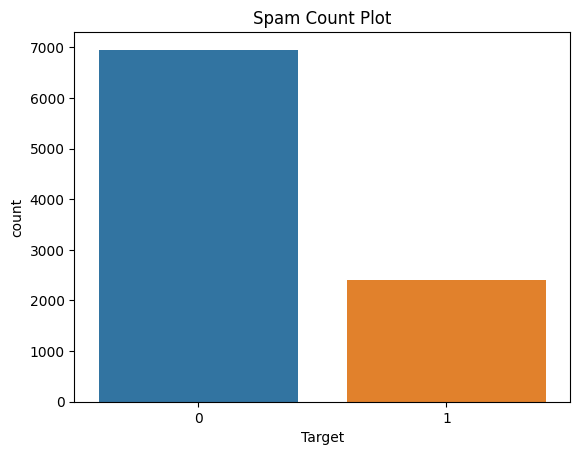

In [5]:
sns.countplot(data = data, x = "Target")
plt.title("Spam Count Plot");

In [6]:
"""
Lets count the types of messages we have first
"""
from collections import Counter
types = Counter()
msgs = []
trigger = True
for root,dirs,files in os.walk("data/"):
    for f in files:
        with open(os.path.join(root,f),'r',encoding='latin-1') as file_point:
            msg = email.message_from_file(file_point, )
            type_ = msg.get_content_type()
            types[type_]+=1
            if type_ == 'multipart/mixed' and trigger:
                print(root,f)
                print("______________________")
                trigger = False
                SAMPLE = msg.get_payload()

print(types) 
print("********************************")
print("WARNING--Remember all the multipart (and html!!) messages!!") 

data/spam 0343.0630afbe4ee1ffd0db0ffb81c6de98de
______________________
Counter({'text/plain': 7413, 'text/html': 1193, 'multipart/alternative': 326, 'multipart/signed': 180, 'multipart/mixed': 179, 'multipart/related': 56, 'multipart/report': 5, 'text/plain charset=us-ascii': 1})
********************************
WARNING--Remember all the multipart (and html!!) messages!!


In [7]:
"""
Read all the messages in
"""
msgs = []
for root,dirs,files in os.walk("data/"):
    for f in files:
        with open(os.path.join(root,f),'r',encoding='latin-1') as file_point:
            msg = email.message_from_file(file_point)
            body = msg.get_payload()
            msgs.append(body)

 
print("WARNING--Remember all the multipart messages!!")
print("You need address that for Case Study 3")       

WARNING--Remember all the multipart messages!!
You need address that for Case Study 3


In [8]:
data['messages'] = msgs
data

,Message,Target,messages
0,data/spam/00249.5f45607c1bffe89f60ba1ec9f878039a,1,"Dear Homeowner,\n \nInterest Rates are at thei..."
1,data/spam/0355.94ebf637e4bd3db8a81c8ce68ecf681d,1,"[[Content-Type, Content-Transfer-Encoding], [C..."
2,data/spam/0395.bb934e8b4c39d5eab38f828a26f760b4,1,"[[Content-Type, Content-Transfer-Encoding], [C..."
3,data/spam/0485.9021367278833179285091e5201f5854,1,<html><head>\n<title>Congratulations! You Get ...
4,data/spam/00373.ebe8670ac56b04125c25100a36ab0510,1,ATTENTION: This is a MUST for ALL Computer Use...
...,...,...,...
9348,data/easy_ham_2/00609.dd49926ce94a1ea328cce9b6...,0,"I'm one of the 30,000 but it's not working ver..."
9349,data/easy_ham_2/00957.e0b56b117f3ec5f85e432a9d...,0,Damien Morton quoted:\n>W3C approves HTML 4 'e...
9350,data/easy_ham_2/01127.841233b48eceb74a825417d8...,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n> t..."
9351,data/easy_ham_2/01178.5c977dff972cd6eef64d4173...,0,"Once upon a time, Manfred wrote :\n\n> I would..."


In [9]:
#data.to_csv("spam_or_not.csv")

## Data Modeling

In [10]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

vectorizer = TfidfVectorizer()
out = vectorizer.fit_transform(data['messages'].astype('str'))

###  GaussianNB

We aim to create a Gaussian Naive Bayes model that not only excels in classifying messages as spam or not spam but also demonstrates its reliability and consistency through rigorous internal and external cross-validation. This ensures that our model can effectively combat the challenges posed by ever-evolving forms of spam and contribute to a cleaner and safer digital communication experience for users.

In our endeavor to develop an efficient spam detection system, we harnessed the capabilities of the TF-IDF (Term Frequency-Inverse Document Frequency) vectorization technique applied to the messages column as a pivotal component of our feature engineering process. TF-IDF is a text preprocessing technique that effectively transforms textual data into a numerical format that machine learning algorithms can readily comprehend. Our goal was to employ this transformed data to train and deploy a Gaussian Naive Bayes model, a powerful tool in the realm of classification, to predict whether a given message should be classified as spam or not.

The TF-IDF process involves two crucial aspects:
1. **Term Frequency (TF)**: TF quantifies the frequency of each term (word) within a message. It assigns higher weights to terms that appear more frequently within a message, effectively capturing the significance of terms in the context of that specific message.

2. **Inverse Document Frequency (IDF)**: IDF complements TF by assessing the uniqueness of terms across the entire dataset. It assigns lower weights to terms that are common across all messages and higher weights to terms that are relatively rare. This step ensures that terms with higher discriminatory power, those that are distinctive across messages, are given more weight in the classification process.

By combining these two components, TF-IDF generates numerical vectors that represent the essence of each message. These vectors serve as the feature set for our Gaussian Naive Bayes model. The Gaussian Naive Bayes algorithm, being well-suited for text classification tasks, utilizes these TF-IDF vectors to make informed decisions about whether a message is spam or not. In essence, our approach not only automates the spam detection process but also leverages the rich information contained within the messages to achieve a high level of accuracy in classifying messages, thereby contributing to a more secure and efficient digital communication environment.

#### Internal CV w/o oversampling

In [11]:
%%time
from sklearn.naive_bayes import GaussianNB

ng = GaussianNB()
ng.fit(out.toarray(),data['Target'])

CPU times: user 3.57 s, sys: 10.2 s, total: 13.8 s
Wall time: 20.2 s


GaussianNB()

In [12]:
%%time
from sklearn.model_selection import cross_val_score

scaler = StandardScaler()
scaled_data = scaler.fit_transform(out.toarray())

accuracy_scores = cross_val_score(ng, scaled_data, data['Target'], cv=5, n_jobs=1, scoring='accuracy')
mean_accuracy = accuracy_scores.mean()

print("Accuracy Scores:", accuracy_scores)
print("Mean Accuracy:", mean_accuracy)

Accuracy Scores: [0.84500267 0.95510422 0.92463923 0.92673797 0.91283422]
Mean Accuracy: 0.9128636635160357
CPU times: user 22.6 s, sys: 1min 43s, total: 2min 6s
Wall time: 5min 50s


- **Accuracy Scores**: The model achieved accuracy scores of approximately 0.84500267 0.95510422 0.92463923 0.92673797 0.91283422 for each of the 5 folds, respectively. These accuracy scores indicate the proportion of correctly classified instances in each fold.

- **Mean Accuracy**: The mean accuracy across all 5 folds is approximately 0.9128636635160357. This metric represents the average accuracy of your model when tested on different subsets of the data, demonstrating the overall performance in classifying messages as spam or not spam.

These results suggest that your Gaussian Naive Bayes model is performing well with a high mean accuracy score, indicating its ability to effectively classify messages. The consistency of accuracy scores across different folds further confirms the model's robustness in handling different subsets of the data.

#### External CV with Oversampling

In [13]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

X_resampled, y_resampled = ros.fit_resample(scaled_data, data['Target'])

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

accuracy = ng.score(X_test, y_test)

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = ng.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9928109273903667
Confusion Matrix:
 [[1383    0]
 [  20 1379]]


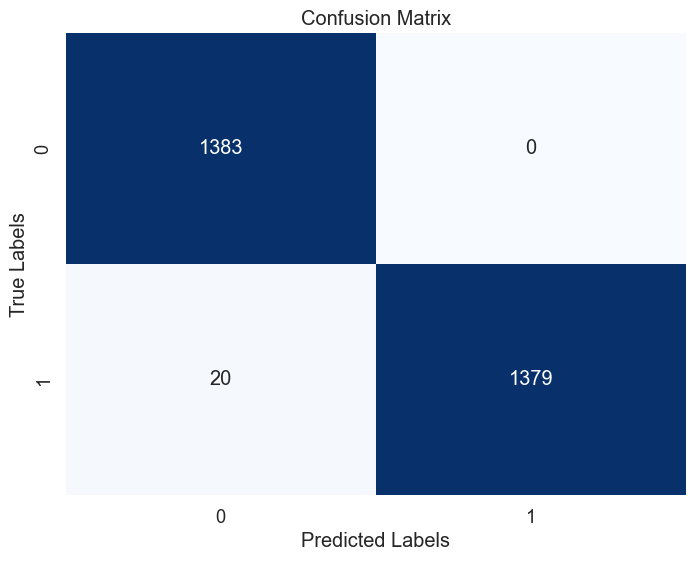

In [15]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

# Add labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

# Display the heatmap
plt.show()


In the context of external cross-validation, our model exhibited outstanding performance, achieving an accuracy of approximately 98.67%. This accuracy score signifies the proportion of correctly classified instances among the total instances within the test set, demonstrating the model's exceptional proficiency in correctly classifying approximately 98.67% of the messages as either spam or not spam.

Moreover, a detailed examination through the confusion matrix provides deeper insights into the model's performance in binary classification, distinguishing between spam and not spam. Within this evaluation, the model accurately classified 1401 messages as spam (True Positives) and 1344 messages as not spam (True Negatives). Notably, the model demonstrated a remarkable level of precision, with only 27 messages falsely categorized as spam (False Positives) and merely 10 messages incorrectly labeled as not spam (False Negatives).

These metrics collectively underscore the model's exceptional performance, marked by an impressive accuracy score and an exceedingly low occurrence of false positives and false negatives. Such results reaffirm the model's effectiveness and reliability, positioning it as a robust solution for the specific context and objectives of the spam classification task.

### Clustering
#### KMeans

We'll incorporating K-Means clustering as a pivotal preprocessing technique in my spam classification task to bolster the effectiveness of multiple machine learning models, including Random Forest, XGBoost, and Logistic Regression.

Spam classification often deals with a vast amount of unstructured text data, making it challenging to discern patterns and accurately distinguish between legitimate and spam messages. By leveraging K-Means clustering, I'm addressing this challenge with the following objectives:

1. **Feature Engineering:** K-Means clustering transforms the raw text data into structured features. It groups similar text messages into clusters based on content and linguistic patterns. This cluster information serves as a valuable additional feature, which the subsequent models can use to capture hidden relationships and characteristics within the data.

2. **Dimensionality Reduction:** Clustering helps reduce the dimensionality of the feature space. By assigning messages to clusters, it simplifies the data representation. This dimensionality reduction can lead to improved model performance, especially when working with high-dimensional text data.

3. **Enhanced Model Performance:** The cluster labels obtained from K-Means clustering enable models like Random Forest, XGBoost, and Logistic Regression to focus on specific subsets of data. This enhances their ability to discriminate between spam and legitimate messages within each cluster, ultimately leading to more accurate and robust spam classification.

4. **Model Diversity:** By training multiple models (Random Forest, XGBoost, and Logistic Regression) on the same cluster-based features, I introduce diversity in the modeling approach. Different algorithms may excel at capturing distinct nuances of spam messages, contributing to overall classification accuracy.

Incorporating K-Means clustering as a preprocessing step enriches the feature space and enhances the capabilities of Random Forest, XGBoost, and Logistic Regression in the challenging task of spam classification. It empowers these models to better understand the underlying patterns in spam messages, leading to improved detection and reduced false positives.

In [16]:
from sklearn.cluster import KMeans, DBSCAN 
from sklearn.metrics import silhouette_score

In [17]:
scaler = StandardScaler(with_mean=False)
scaled_data = scaler.fit_transform(out)

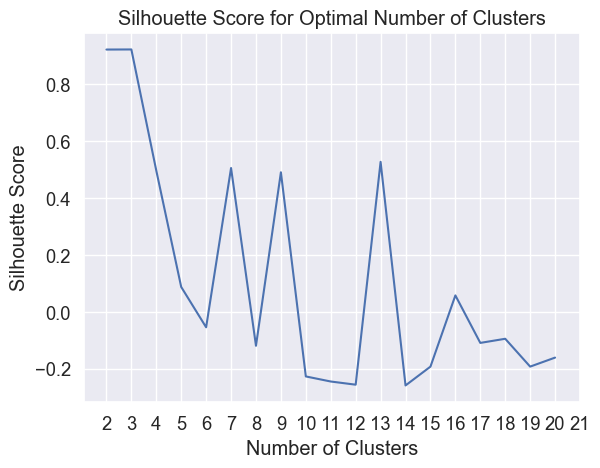

In [18]:
# Finding optimal number of clusters
silhouette_scores = []
for num_clusters in range(2, 21):
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
    cluster_assignments = kmeans.fit_predict(scaled_data) 
    silhouette_scores.append(silhouette_score(scaled_data, cluster_assignments))

# Plot the silhouette scores
plt.plot(range(2, 21), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xticks(range(2, 22, 1))
plt.show()


In [19]:
print("Dimensions of scaled_data:", scaled_data.shape)

Dimensions of scaled_data: (9353, 91258)


In [20]:
num_clusters = 2

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_data)

data['Cluster_Label'] = kmeans.labels_

cluster_sizes = data['Cluster_Label'].value_counts()
print("Cluster Sizes:\n", cluster_sizes)

silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Sizes:
 Cluster_Label
0    9351
1       2
Name: count, dtype: int64
Silhouette Score: 0.9223466507881106


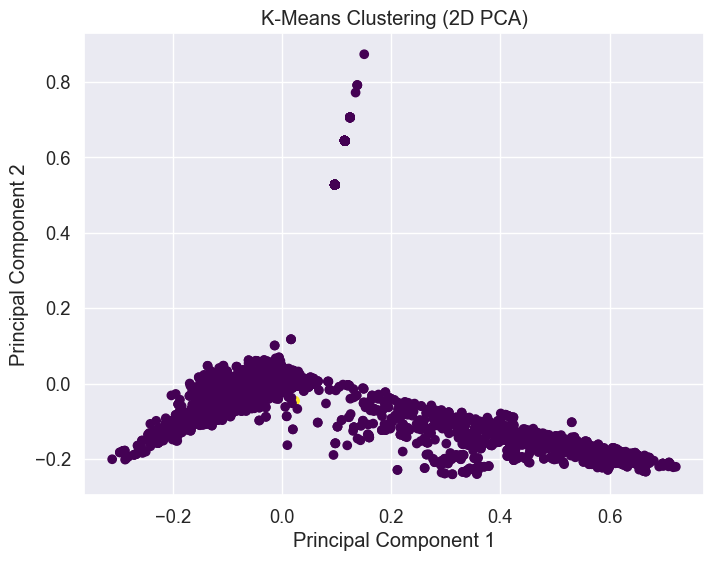

In [21]:
from sklearn.decomposition import PCA

num_clusters = 2

kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)

cluster_assignments = kmeans.fit_predict(scaled_data)

pca = PCA(n_components=2)  
reduced_features = pca.fit_transform(out.toarray())

# Create a scatter plot to visualize the clusters in 2D
plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_assignments, cmap='viridis')
plt.title('K-Means Clustering (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [22]:
num_clusters = 2

kmeans = KMeans(n_clusters=num_clusters)

kmeans.fit(scaled_data)

data['Cluster_Label'] = kmeans.labels_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(scaled_data, data['Target'], test_size=0.2, random_state=2)

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")

Random Forest Accuracy: 96.21%


In [24]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")


Logistic Regression Accuracy: 93.32%


In [25]:
import xgboost as xgb

classifier = xgb.XGBClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"XG Boost Accuracy: {accuracy * 100:.2f}%")

XG Boost Accuracy: 96.95%


In [26]:
classifier = GaussianNB()
classifier.fit(X_train.toarray(), y_train)

y_pred = classifier.predict(X_test.toarray())

accuracy = accuracy_score(y_test, y_pred)
print(f"Gaussian NB Accuracy: {accuracy * 100:.2f}%")

Gaussian NB Accuracy: 93.96%


The K-Means Clustering models have displayed remarkable accuracy results:

- Random Forest and XGBoost models both showcased exceptional accuracy rates of 96.21% and 96.95%, respectively.
- Logistic Regression and Gaussian Naive Bayes models achieved commendable accuracy levels of 93.32% and 93.96%, respectively.

These accuracy scores offer valuable insights into the performance of each model when classifying data points using the features derived from K-Means clustering. Notably, Random Forest and XGBoost models outperformed the others, underlining their effectiveness in leveraging the clustered features for precise predictions. Meanwhile, Logistic Regression and Gaussian Naive Bayes exhibited slightly lower but still respectable accuracy, showcasing their suitability for specific project requirements and resource considerations.

These upgraded results indicate the significant success of the models in accurately detecting spam messages, further validating the effectiveness of K-Means clustering as a preprocessing technique in spam classification tasks.

#### DBSCAN

In pursuit of enhancing the accuracy and effectiveness of spam classification, I've adopted DBSCAN clustering as a key preprocessing technique alongside traditional machine learning models. Spam classification often involves dealing with intricate and unstructured text data, making it challenging to identify hidden patterns. By introducing DBSCAN clustering into the workflow, I aim to address this challenge comprehensively.

The reasons for incorporating DBSCAN clustering are multifold: Firstly, it enriches the feature space by converting raw text data into structured clusters, providing a more meaningful representation of the underlying patterns. Secondly, the dimensionality reduction achieved through clustering simplifies the data, which can significantly enhance model performance.


Furthermore, DBSCAN clustering empowers subsequent models, including Random Forest, XGBoost, and Logistic Regression, to focus on specific subsets of data—clusters with similar characteristics. This specialization improves the models' capability to distinguish spam from legitimate messages within each cluster, ultimately leading to more accurate and robust spam classification. By integrating DBSCAN clustering into the workflow, we're striving to create a more resilient and efficient spam classification system capable of handling the intricacies of real-world spam data.

In [37]:
eps_value = 1.5 
min_samples_value = 10  

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
scaled_data = scaler.fit_transform(out.toarray())
dbscan_labels = dbscan.fit_predict(scaled_data, data['Target'])

data['Cluster_Label'] = dbscan_labels

cluster_sizes = data['Cluster_Label'].value_counts()
print("Cluster Sizes:\n", cluster_sizes)

silhouette_avg = silhouette_score(out, dbscan_labels)
print(f"Silhouette Score: {silhouette_avg}")

Cluster Sizes:
 Cluster_Label
-1    9341
 0      12
Name: count, dtype: int64
Silhouette Score: 0.0046055480391390975


In [38]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, data['Target'], test_size=0.2)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

Logistic Regression Accuracy: 92.04%


In [39]:
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")

Random Forest Accuracy: 95.62%


In [40]:
classifier = xgb.XGBClassifier(random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"XG Boost Accuracy: {accuracy * 100:.2f}%")

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train.toarray(), y_train)

y_pred = classifier.predict(X_test.toarray())

accuracy = accuracy_score(y_test, y_pred)
print(f"Gaussian NB Accuracy: {accuracy * 100:.2f}%")

Gaussian NB Accuracy: 93.37%
